In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Jupyterの表示オプション
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# エクセルファイルの読み込み
# SIS日刊データ
SIS_df=pd.read_excel("SIS分析プロジェクト_日刊60日切り-週間100データ対応_容量削減ver_200819.xlsm",
                     sheet_name="日毎データ累積",
                     header=1,
                     encoding="cp932")
SIS_df_droped=SIS_df.dropna(subset=["機種名","客滞"])
SIS_df_droped['機種名']=SIS_df_droped['機種名'].str.strip()
# SIS_df_droped=SIS_df_droped[(SIS_df_droped["客滞"] != "データなし")]

# 市場スペックデータ
Spec_df=pd.read_excel("右打ちチェック用市場データ改β.xlsm",
                      sheet_name="データベース",                      
                      encoding="cp932")
df_renamed=Spec_df.rename(columns={"Oneshot_Rate":"単発率",
                                    "SurfaceCont_Rate":"名目継続率",
                                    "HeavenRush_Rate":"天国突入率",
                                    "FirtstT1Y_Ave":"初回平均T1Y",
                                    "GuessSimMY_Ave":"平均MY"})
# 継続率をビン分割
Cont_bins = [0,0.5,0.6,0.7,0.8,0.9,1]
TS_bins = [0,70,150,220,270,320]
Contbins_names=["継続0%-50%","継続50%-60%","継続60%-70%","継続70%-80%","継続80%-90%","継続90%-100%"]
TSbins_names=["甘未満","甘デジ","ライトミドル","ミドル","ハイミドル"]
# dfにビンの列を追加
df_renamed["継続率帯"] = pd.cut(df_renamed["名目継続率"], Cont_bins, labels=Contbins_names)
df_renamed["TS帯"] = pd.cut(df_renamed["TS"], TS_bins, labels=TSbins_names)
df_renamed
# 過去機種データベース
Product_df=pd.read_excel("過去機種データベースまとめ_200416.xlsx",
                         sheet_name="オール機種 数値化",
                         header=11,
                         encoding="cp932")

<ipython-input-12-a019e2965780>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIS_df_droped['機種名']=SIS_df_droped['機種名'].str.strip()


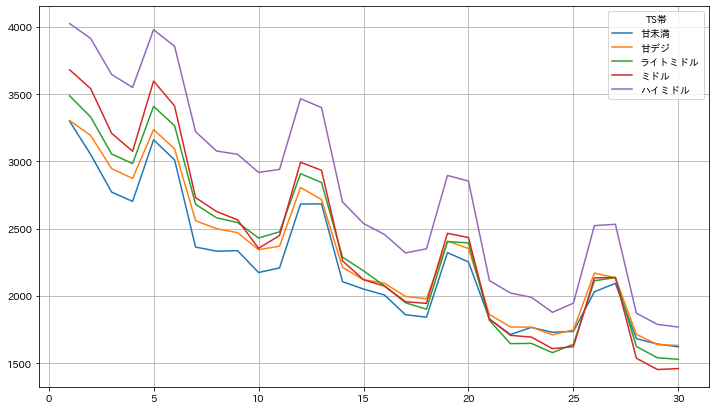

In [13]:
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="導入日数",
                                       values="アウト",
                                       aggfunc="mean")
                                   
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
grouped=merge_df.groupby("TS帯").mean()[date_list].T.iloc[0:30]
grouped.plot(figsize=(12,7),grid=True)

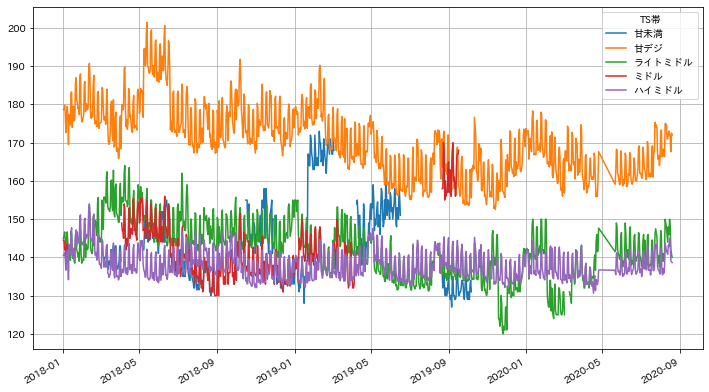

In [155]:
#　客滞の集計表示
SIS_df_droped=SIS_df_droped.set_index("日付")["2018-01-01":].reset_index()
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="日付",
                                       values="客滞",
                                       aggfunc="mean")
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
grouped=merge_df.groupby("TS帯").mean()[date_list].T
grouped.plot(figsize=(12,7),grid=True)

In [23]:
# 必要項目毎の機種別平均データに変換
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       values=["客滞","玉粗","千円S","アウト"],
                                       aggfunc="mean")
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=df_renamed,
                  left_index=True,
                  right_on="Product_name",
                  how="left") 
sns.pairplot(data=merge_df,
             hue="TS帯",
             x_vars="客滞",
             y_vars=["HeavenTY_Ave","玉粗"],
             size=5)

SyntaxError: invalid syntax (<ipython-input-23-da4c439db28f>, line 13)

In [157]:
merge_df

,アウト,千円S,客滞,玉粗,code,Product_name,Date,Main_Flag,Main_Code,Operate_Week,Type,SmallRush_Flag,Set_Flag,Hiding_Flag,Top_Flag,MultiTS_Flag,TS,DirectRush_Rate,FirstJitnum_Ave,単発率,初回平均T1Y,TSA,TotalCont_Ave,名目継続率,SecondJitnum_Ave,SecondT1Y_max,SecondT1YMax_Rate,SecondT1Y_Ave,TY_Ave,TY_over25_Rate,TY_over50_Rate,TY_over100_Rate,TO_Ave,天国突入率,HeavenTY_Ave,HeavenCont_Ave,平均MY,RealSimMY_Ave,Win_Rate,Branch_Start,T1yen_Start,Out_FirstDay,Out_1w,Out_2w,Out_3w,Out_4w,Out_5w,Out_6w,Out_7w,Out_8w,Out_9w,Out_10w,Out_11w,Out_12w,Out_13w,Dnum_1w,Dnum_2w,Dnum_3w,Dnum_4w,Dnum_5w,Dnum_6w,Dnum_7w,Dnum_8w,Dnum_9w,Dnum_10w,Dnum_11w,Dnum_12w,Dnum_13w,継続率帯,TS帯
723.0,2766.904762,19.202381,137.357143,0.183810,723.0,CR ＣＹＢＯＲＧ００９ L-V,2019-02-04,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,319.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,5.270,NaN,NaN,4098.0,3393.0,2776.0,2544.0,1980.0,1670.0,1580.0,1397.0,1290.0,1234.0,1183.0,1210.0,1651.0,10090.0,10080.0,10090.0,9990.0,9750.0,9670.0,9230.0,9150.0,8850.0,8780.0,8740.0,7680.0,7650.0,NaN,ハイミドル
614.0,2588.035714,18.180952,130.250000,0.235595,614.0,CR ＦＡＩＲＹ ＴＡＩＬ FPM,2018-02-26,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,319.7,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,NaN,220.0,NaN,2240.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500.0,NaN,NaN,NaN,NaN,3132.0,4306.0,3575.0,3132.0,2701.0,2260.0,2105.0,1815.0,1885.0,2081.0,1455.0,1323.0,1314.0,1330.0,5450.0,5330.0,5310.0,5250.0,5170.0,5080.0,5060.0,5010.0,4920.0,4570.0,2020.0,4900.0,4830.0,継続60%-70%,ハイミドル
NaN,1028.590909,21.381818,145.136364,0.272727,NaN,CR ＧＧＧＧ ZB（ＡＬＬ２０２５ ｗｉｔｈ １００）,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677.0,2139.777778,20.096296,159.555556,0.088519,678.0,CR Ｊ－ＲＵＳＨ４ HSJ,2018-09-17,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,289.9,NaN,NaN,NaN,NaN,NaN,NaN,0.501966,NaN,137.0,NaN,1106.976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN,NaN,NaN,2953.0,2078.0,1779.0,1506.0,1420.0,1369.0,1330.0,1347.0,1200.0,1335.0,1211.0,1257.0,1265.0,1470.0,1460.0,1430.0,1390.0,1330.0,1280.0,1220.0,1240.0,1220.0,1160.0,1150.0,1070.0,1060.0,継続50%-60%,ハイミドル
636.0,2297.125000,19.105357,127.875000,0.322500,635.0,CR ＪＡＷＳ再臨H1BY2,2018-05-07,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,319.6,NaN,NaN,NaN,NaN,NaN,NaN,0.640392,NaN,189.0,NaN,2016.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,2578.0,3843.0,3184.0,2578.0,2268.0,1764.0,1575.0,1434.0,1405.0,1396.0,1215.0,1230.0,1152.0,1026.0,6710.0,6730.0,6670.0,6580.0,6320.0,6230.0,5980.0,6050.0,5600.0,5360.0,5300.0,4920.0,4860.0,継続60%-70%,ハイミドル
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809.0,1360.800000,20.632000,132.340000,0.394400,810.0,P銭形平次２ V2L,2019-09-02,1.0,NaN,3.0,ST,0.0,0.0,0.0,0.0,0.0,219.1,0.04,5.0,0.43570,359.7,6.70,3.844,0.801000,0.0,1096.7,0.50,712.800,2257.6,NaN,NaN,NaN,771.5,0.57157,3439.5,5.042,13600.0,12000.0,NaN,6.253,24.279,3070.0,2516.0,1771.0,1252.0,1034.0,896.0,763.0,749.0,781.0,635.0,652.0,539.0,565.0,552.0,1870.0,1860.0,1780.0,1870.0,1900.0,1700.0,1660.0,1500.0,1460.0,1390.0,1290.0,1180.0,1120.0,継続80%-90%,ライトミドル
866.0,1404.571429,17.546429,123.214286,0.064286,866.0,P闘将覇伝HSJ-W,2020-02-03,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,1331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,830.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673.0,2056.000000,20.850000,166.750000,0.288214,673.0,P魔法先生ネギま！ZZ-Y,2018-09-03,0.0,561.0,5.0,ループ,0.0,0.0,0.0,0.0,0.0,119.8,0.50,0.0,0.49856,316.2,2.29,3.539,0.803000,1.0,635.1,0.20,383.600,1260.9,NaN,

In [10]:
df_renamed

,code,Product_name,Date,Main_Flag,Main_Code,Operate_Week,Type,SmallRush_Flag,Set_Flag,Hiding_Flag,Top_Flag,MultiTS_Flag,TS,DirectRush_Rate,FirstJitnum_Ave,単発率,初回平均T1Y,TSA,TotalCont_Ave,名目継続率,SecondJitnum_Ave,SecondT1Y_max,SecondT1YMax_Rate,SecondT1Y_Ave,TY_Ave,TY_over25_Rate,TY_over50_Rate,TY_over100_Rate,TO_Ave,天国突入率,HeavenTY_Ave,HeavenCont_Ave,平均MY,RealSimMY_Ave,Win_Rate,Branch_Start,T1yen_Start,Out_FirstDay,Out_1w,Out_2w,Out_3w,Out_4w,Out_5w,Out_6w,Out_7w,Out_8w,Out_9w,Out_10w,Out_11w,Out_12w,Out_13w,Dnum_1w,Dnum_2w,Dnum_3w,Dnum_4w,Dnum_5w,Dnum_6w,Dnum_7w,Dnum_8w,Dnum_9w,Dnum_10w,Dnum_11w,Dnum_12w,Dnum_13w
0,1,CRトラック野郎LR-T,2014-01-06,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,299.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,5.870,NaN,NaN,3974,4179.0,3476.0,2459.0,2147.0,1833.0,1695.0,1537.0,1342.0,1300.0,1223.0,1273.0,1182.0,260,1160.0,1450.0,1470.0,1450.0,1440.0,1400.0,1350.0,1320.0,1280.0,1260.0,1300.0,1130.0
1,8,CRぱちんこ仮面ライダーＶ３ L1,2014-01-13,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,NaN,NaN,NaN,NaN,0.712246,NaN,133.0,NaN,742.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0,NaN,NaN,5.730,17.600,NaN,4281,3985.0,3479.0,3275.0,3053.0,2953.0,2752.0,2518.0,2492.0,2331.0,2359.0,2239.0,2164.0,2110,2980.0,2970.0,2990.0,2990.0,3000.0,3000.0,2980.0,2970.0,2960.0,3240.0,2950.0,2930.0
2,6,CRA春夏秋冬 極上～粋な祭りだ！はっぴぃ！～,2014-01-13,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,NaN,NaN,NaN,NaN,0.665876,NaN,122.0,NaN,880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,5.990,18.700,NaN,3868,3510.0,2795.0,2709.0,2581.0,2568.0,2530.0,2310.0,2282.0,2197.0,2195.0,2164.0,2137.0,210,310.0,320.0,320.0,330.0,330.0,360.0,360.0,380.0,390.0,430.0,400.0,400.0
3,7,CRゲゲゲの鬼太郎 地獄からの使者FPW,2014-01-13,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0,NaN,NaN,5.910,NaN,NaN,3470,3024.0,2321.0,2073.0,1876.0,1759.0,1628.0,1393.0,1369.0,1272.0,1330.0,1258.0,1231.0,460,700.0,710.0,720.0,750.0,750.0,730.0,710.0,680.0,670.0,720.0,610.0,590.0
4,2,CRダービースタリオンXX･Y,2014-01-13,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000.0,NaN,NaN,5.580,NaN,NaN,3631,2932.0,1893.0,1674.0,1438.0,1379.0,1250.0,1040.0,1011.0,902.0,898.0,870.0,871.0,1140,1550.0,1530.0,1510.0,1450.0,1360.0,1230.0,1150.0,1090.0,1010.0,1060.0,820.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,897,Pうる星やつらN-K,2020-05-11,0.0,771.0,NaN,ST,0.0,0.0,0.0,0.0,0.0,99.9,0.55,50.0,0.42842,285.2,87.3,2.882,0.684000,0.0,713.2,0.5,534.9,1172.2,NaN,NaN,NaN,1077.5,0.73709,1444.6,3.297,8700.0,7900.0,NaN,6.199,21.288,1492.0,1876,1535.0,1401.0,1292.0,1227.0,1185.0,1139.0,1112.0,NaN,NaN,NaN,NaN,NaN,1060,1050.0,1040.0,990.0,930.0,860.0,650.0,500.0,NaN,NaN,NaN,NaN,NaN
898,898,Pリング 呪いの７日間２ JN,2020-05-11,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520,2127.0,1979.0,1877.0,1846.0,1782.0,1683.0,1751.0,1836.0,NaN,NaN,NaN,NaN,2490,2350.0,2290.0,2220.0,2130.0,2000.0,1830.0,1580.0,560.0,NaN,NaN,NaN,NaN
899,900,P元祖大工の源さんWCC,2020-05-11,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1576,1205.0,1063.0,911.0,884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070,1030.0,930.0,840.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,901,Pひぐらしのなく頃に～廻～AG-S,2020-05-11,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1733,1500.0,1420.0,1320.0,1306.0,1289.0,1305.0,1323.0,NaN,NaN,NaN,NaN,NaN,710,710.0,690.0,680.0,650.0,590.0,540.0,500.0,NaN,NaN,NaN,NaN,NaN
